In [1]:
library(Signac)
library(Seurat)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(patchwork)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.4.1 but the current version is
4.4.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, 

In [2]:
library(hdf5r)


Attaching package: 'hdf5r'


The following object is masked from 'package:GenomicRanges':

    values


The following object is masked from 'package:S4Vectors':

    values




In [2]:
plan("multicore", workers = 30)

In [2]:
packageVersion("GenomeInfoDb")

[1] '1.42.0'

In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [3]:
## read merged snATACseq part of the data
all_atac<-readRDS('combined_all_atac.rds')

In [4]:
all_atac

An object of class Seurat 
427997 features across 126012 samples within 1 assay 
Active assay: ATAC (427997 features, 0 variable features)
 2 layers present: counts, data

In [6]:
# load t 10.5w RNA data
counts_nose_10_5w <- Read10X_h5(filename = "rna_matrixes/nose_filtered_feature_bc_matrix_10_5w.h5")
counts_jaw_10_5w <- Read10X_h5(filename = "rna_matrixes/jaw_filtered_feature_bc_matrix_10_5w.h5")
counts_eyes_10_5w <- Read10X_h5(filename = "rna_matrixes/eyes_filtered_feature_bc_matrix_10_5w.h5")

Genome matrix has multiple modalities, returning a list of matrices for this genome

Genome matrix has multiple modalities, returning a list of matrices for this genome

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [7]:
# for 6w 
counts_nose_6w <- Read10X_h5(filename = "rna_matrixes/w6/nose_filtered_feature_bc_matrix.h5")
counts_eye_6w <- Read10X_h5(filename = "rna_matrixes/w6/eye_filtered_feature_bc_matrix.h5")
counts_jaw_6w <- Read10X_h5(filename = "rna_matrixes/w6/jaw_filtered_feature_bc_matrix.h5")

Genome matrix has multiple modalities, returning a list of matrices for this genome

Genome matrix has multiple modalities, returning a list of matrices for this genome

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [8]:
#for 11w 
counts_eyes_11w <- Read10X_h5(filename = "rna_matrixes/w11/filtered_feature_bc_matrix_MO_24_020.h5")
counts_nose_11w <- Read10X_h5(filename = "rna_matrixes/w11/filtered_feature_bc_matrix_MO_24_021.h5")
counts_jaw_11w <- Read10X_h5(filename = "rna_matrixes/w11/filtered_feature_bc_matrix_MO_24_019.h5")
counts_rest_11w <- Read10X_h5(filename = "rna_matrixes/w11/filtered_feature_bc_matrix_MO_24_022.h5")


Genome matrix has multiple modalities, returning a list of matrices for this genome

Genome matrix has multiple modalities, returning a list of matrices for this genome

Genome matrix has multiple modalities, returning a list of matrices for this genome

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [9]:
### 6.5 week anterior posterior
counts_Px_101 <- Read10X_h5(filename = "~/face_project/Px_101/outs/filtered_feature_bc_matrix.h5")
counts_Px_102 <- Read10X_h5(filename = "~/face_project/Px_102/outs/filtered_feature_bc_matrix.h5")

Genome matrix has multiple modalities, returning a list of matrices for this genome

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [10]:
rna_object_nose_10_5w <- CreateSeuratObject(counts = counts_nose_10_5w$`Gene Expression`, assay = "RNA")
rm(counts_nose_10_5w)
rna_object_jaw_10_5w <- CreateSeuratObject(counts = counts_jaw_10_5w$`Gene Expression`, assay = "RNA")
rm(counts_jaw_10_5w)
rna_object_eyes_10_5w <- CreateSeuratObject(counts = counts_eyes_10_5w$`Gene Expression`, assay = "RNA")
rm(counts_eyes_10_5w)

rna_object_nose_6w <- CreateSeuratObject(counts = counts_nose_6w$`Gene Expression`, assay = "RNA")
rm(counts_nose_6w)
rna_object_jaw_6w <- CreateSeuratObject(counts = counts_jaw_6w$`Gene Expression`, assay = "RNA")
rm(counts_jaw_6w)
rna_object_eye_6w <- CreateSeuratObject(counts = counts_eye_6w$`Gene Expression`, assay = "RNA")
rm(counts_eye_6w)

In [11]:
rna_object_nose_11w <- CreateSeuratObject(counts = counts_nose_11w$`Gene Expression`, assay = "RNA")
rm(counts_nose_11w)
rna_object_jaw_11w <- CreateSeuratObject(counts = counts_jaw_11w$`Gene Expression`, assay = "RNA")
rm(counts_jaw_11w)
rna_object_eyes_11w <- CreateSeuratObject(counts = counts_eyes_11w$`Gene Expression`, assay = "RNA")
rm(counts_eyes_11w)
rna_object_rest_11w <- CreateSeuratObject(counts = counts_rest_11w$`Gene Expression`, assay = "RNA")
rm(counts_rest_11w)


In [12]:
rna_object_Px_101 <- CreateSeuratObject(counts = counts_Px_101$`Gene Expression`, assay = "RNA")
rm(counts_Px_101)
rna_object_Px_102 <- CreateSeuratObject(counts = counts_Px_102$`Gene Expression`, assay = "RNA")
rm(counts_Px_102)


In [31]:
# merge multiple datasets adding cellids according to the sample
merged_rna <- merge(rna_object_nose_10_5w, y = c(rna_object_jaw_10_5w, rna_object_eyes_10_5w, rna_object_eye_6w,rna_object_jaw_6w,  
                                                    rna_object_nose_6w, rna_object_eyes_11w,rna_object_jaw_11w,  
                                                    rna_object_nose_11w, rna_object_rest_11w, rna_object_Px_101, rna_object_Px_102), merge.data = TRUE)

Warning message:
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [65]:
saveRDS(merged_rna, 'merged_rna.rds')

In [32]:
merged_rna

An object of class Seurat 
51795 features across 126012 samples within 1 assay 
Active assay: RNA (51795 features, 0 variable features)
 12 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12

In [33]:
merged_rna <- JoinLayers(merged_rna)

In [34]:
merged_rna

An object of class Seurat 
51795 features across 126012 samples within 1 assay 
Active assay: RNA (51795 features, 0 variable features)
 1 layer present: counts

In [51]:
rm(rna_object_nose_10_5w, rna_object_jaw_10_5w, rna_object_eyes_10_5w, rna_object_nose_6w, rna_object_jaw_6w, 
                                                   rna_object_eye_6w, rna_object_nose_11w, rna_object_jaw_11w, 
                                                   rna_object_eyes_11w, rna_object_rest_11w, rna_object_Px_101, rna_object_Px_102)

In [35]:
# Extract barcodes from the RNA object
rna_barcodes <- colnames(merged_rna)

# Extract barcodes from the ATAC object
atac_barcodes <- colnames(all_atac)


In [36]:
length(rna_barcodes)

[1] 126012

In [37]:
length(atac_barcodes)

[1] 126012

In [38]:
# Find common barcodes
common_barcodes <- intersect(sorted_rna_barcodes, sorted_atac_barcodes)
length(common_barcodes) # Check the number of matching barcodes


[1] 126012

In [41]:
merged_rna[]

An object of class Seurat 
51795 features across 126012 samples within 1 assay 
Active assay: RNA (51795 features, 0 variable features)
 1 layer present: counts

In [ ]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11365098,607.0,22848951,1220.3,22848951,1220.3
Vcells,1693067086,12917.1,8740580417,66685.4,10612412575,80966.3


In [151]:
# Subset RNA data
merged_rna <- subset(merged_rna, cells = adata_atac[,1])

# Subset ATAC data
all_atac <- subset(all_atac, cells = adata_atac[,1])

In [22]:
all(colnames(merged_rna) == colnames(all_atac))

[1] TRUE

In [153]:
all_atac

An object of class Seurat 
395153 features across 42152 samples within 1 assay 
Active assay: ATAC (395153 features, 395147 variable features)
 2 dimensional reductions calculated: lsi, umap

In [156]:
rm(merged_rna)

In [ ]:
##creat new RNA seq assay on existing atacseq data
all_atac[["RNA"]] <- CreateAssayObject(counts = merged_rna[["RNA"]]$counts)

Warning message:
"Different cells and/or features from existing assay RNA"


In [52]:
DefaultAssay(all_atac)<-'RNA'

In [164]:
###add umap scrnaseq data
adata_umap=read.csv("adata_rna_umap_coordinates.csv",row.names = 1)

In [172]:
# Add UMAP coordinates to the Seurat object
all_atac@reductions$umap <- CreateDimReducObject(
  embeddings = as.matrix(adata_umap),
  key = "UMAP_RNA",
  assay = DefaultAssay(all_atac)
)

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from UMAP_RNA to UMAPRNA_"
Warning message:
"All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to UMAPRNA_"


In [175]:
all_atac@reductions

$lsi
A dimensional reduction object with key LSI_ 
 Number of dimensions: 50 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: ATAC 

$umap
A dimensional reduction object with key UMAPRNA_ 
 Number of dimensions: 2 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 


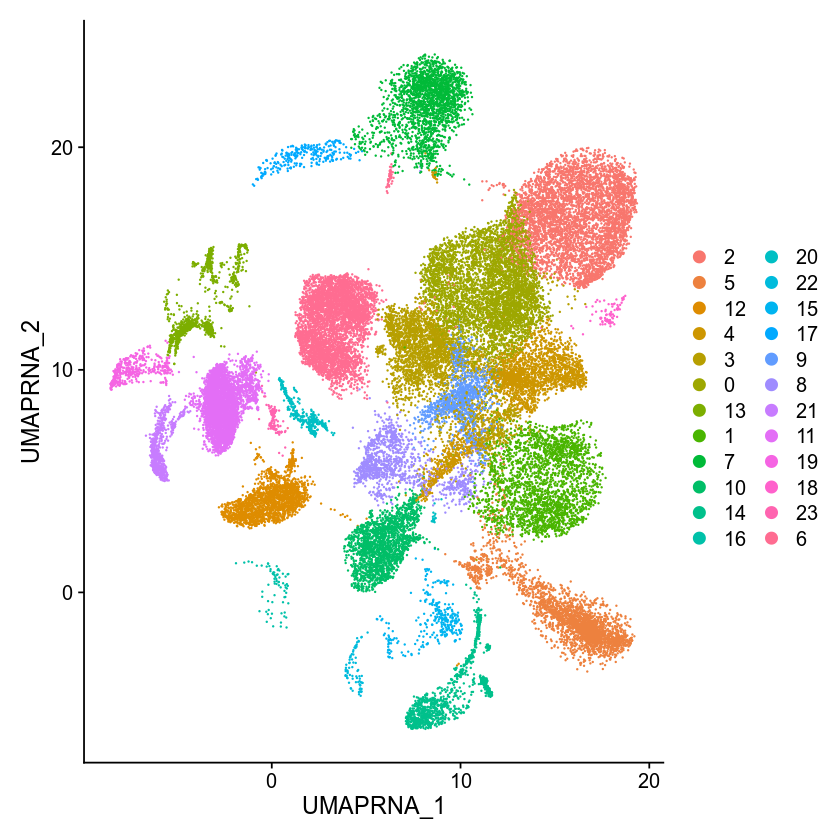

In [197]:
DimPlot(all_atac, reduction='umap')

In [214]:
## add annotation based on all scRNAseq 
new.cluster.ids <- c('0'="mesenchyme_A", "1"="osteogenic", '2'="dermal", "3"="mesenchyme_B ","4"="mesenchyme_C", "5"="chondrocytes","6"='mesenchyme_D',"7"='myoblasts',
                     "8"='mesenchyme_E ', "9"="mesenchyme_F", "10"="perivascular","11"="neural_progenitors", "12"='glia', 
                     "13"='neurons',"14"='endothelia',"15"='immune',"16"='erythrocytes',"17"='myoblasts',
                     "18"='mesenchyme_G',"19"='interneurons', "20"='epithelia', "21"='photoreceptors',"22"='immune',"23"='melanocytes')


In [215]:
#Rename the Clusters
all_atac$annotation <- new.cluster.ids[as.character(all_atac$leiden)]


In [217]:
Idents(all_atac) <- "annotation"

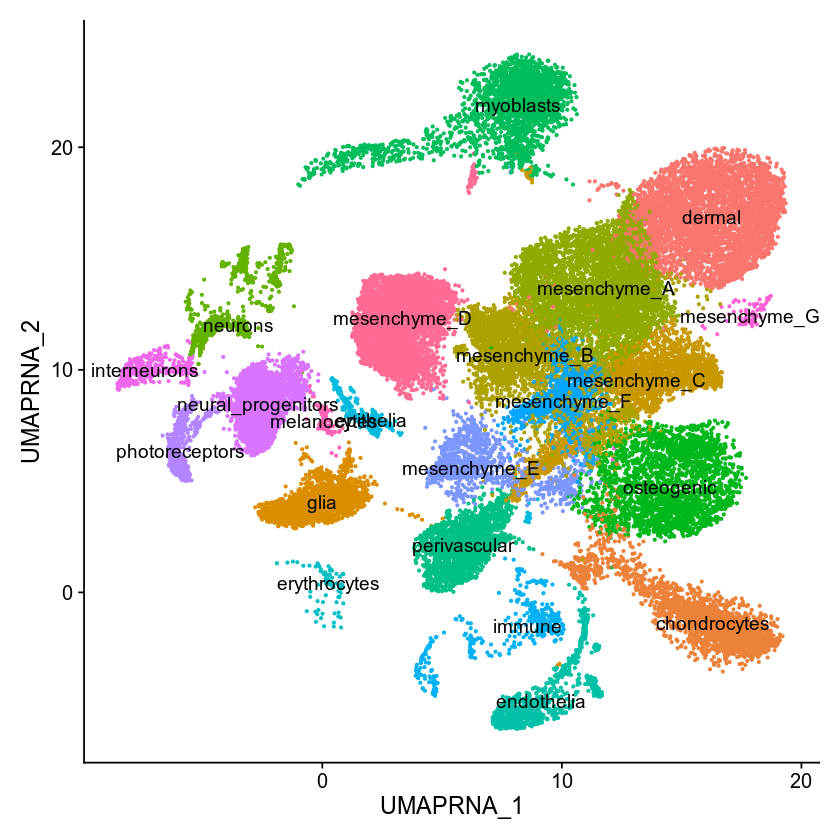

In [219]:
DimPlot(all_atac, reduction = "umap", label = TRUE, pt.size = 0.5) +NoLegend()

## 

In [54]:
#some QC stats
all_atac[["percent.mt"]] <- PercentageFeatureSet(all_atac, pattern = "^MT")

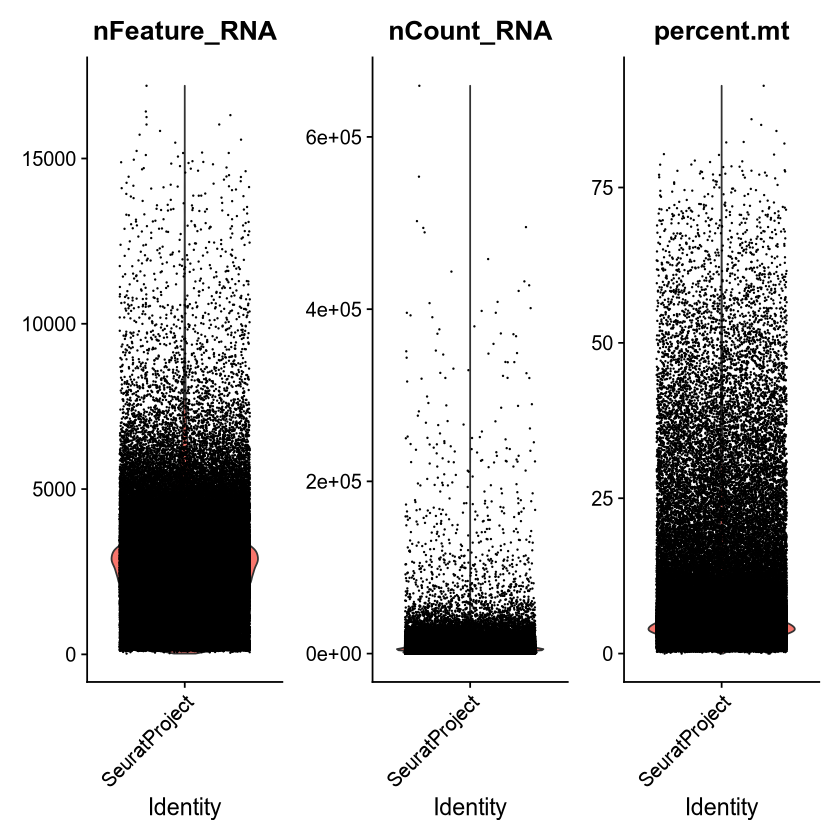

In [55]:
# Visualize QC metrics as a violin plot
VlnPlot(all_atac, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, group.by = 'orig.ident')

In [61]:
all_atac <- subset(all_atac, subset = percent.mt < 10)

In [68]:
all_atac <- subset(all_atac, subset = nCount_RNA < 20000)

In [72]:
all_atac <- subset(all_atac, subset = nCount_RNA > 2000)

In [74]:
all_atac <- subset(all_atac, subset = nFeature_RNA > 1000)

In [ ]:
all_atac <- subset(all_atac, subset = nFeature_RNA < 5000)

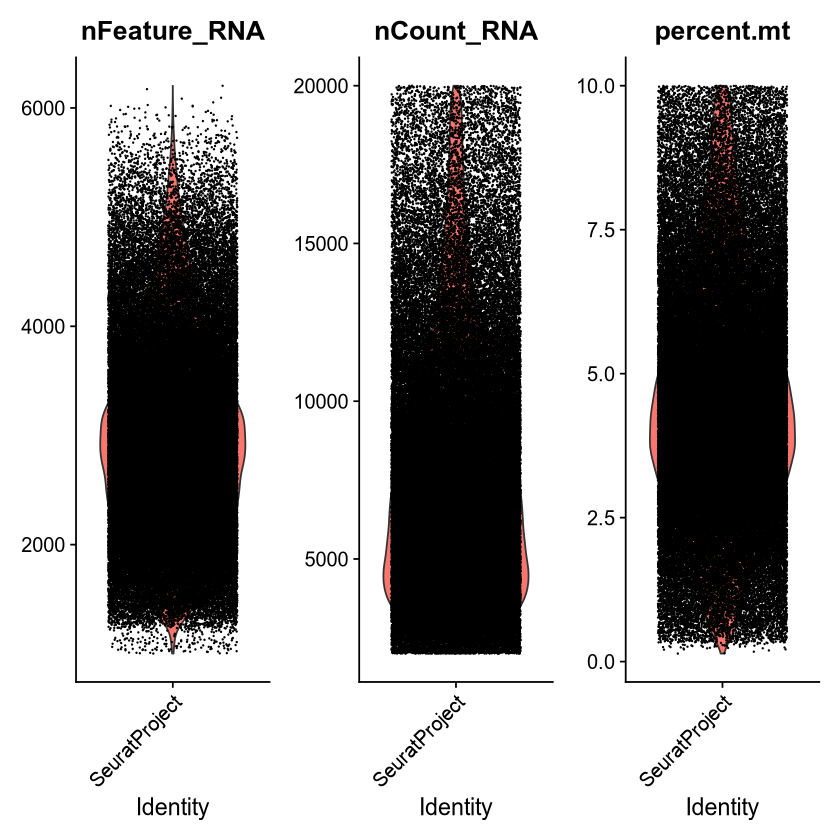

In [75]:
VlnPlot(all_atac, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, group.by = 'orig.ident')

In [76]:
saveRDS(all_atac, "all_multiom.rds")

In [3]:
all_atac<-readRDS('all_multiom.rds')

In [77]:
DefaultAssay(all_atac) <- "ATAC"

In [6]:
library(BSgenome.Hsapiens.UCSC.hg38)

set.seed(1234)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: 'Biostrings'


The following object is masked from 'package:base':

    strsplit


Loading required package: BiocIO

Loading required package: rtracklayer


Attaching package: 'rtracklayer'


The following object is masked from 'package:BiocIO':

    FileForFormat




In [80]:
all_atac

An object of class Seurat 
479792 features across 91740 samples within 2 assays 
Active assay: ATAC (427997 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

In [81]:
DefaultAssay(all_atac) <- "RNA"

In [82]:
all_atac <- NormalizeData(all_atac, normalization.method = "LogNormalize", scale.factor = 10000)

In [87]:
all_atac <- FindVariableFeatures(all_atac, selection.method = "vst", nfeatures = 2000)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."


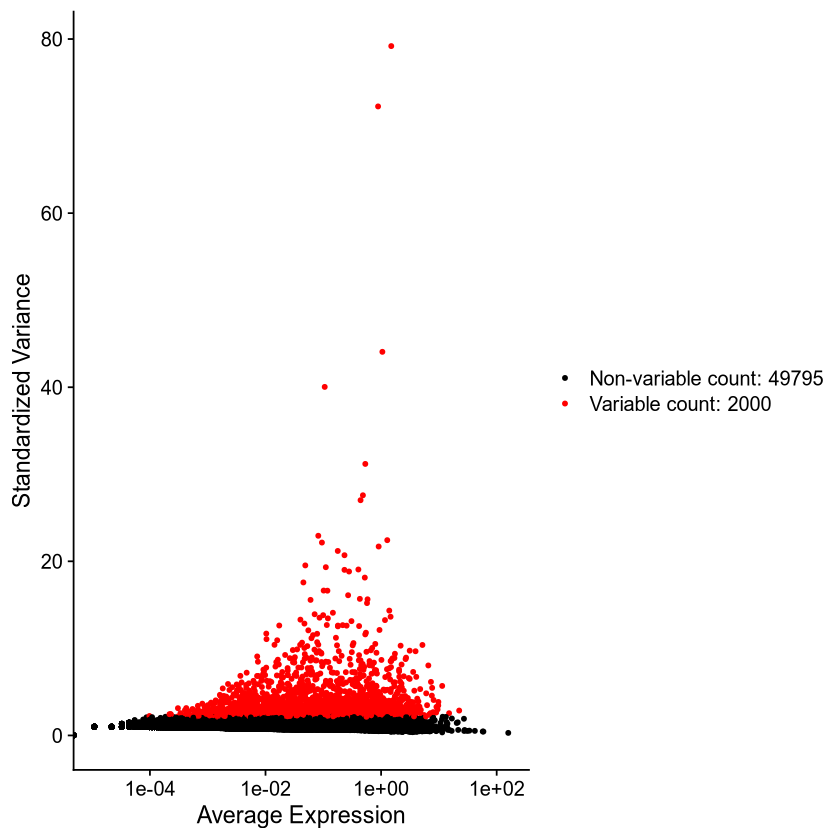

In [89]:

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(all_atac), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(all_atac)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 

In [88]:
all_atac

An object of class Seurat 
479792 features across 91740 samples within 2 assays 
Active assay: RNA (51795 features, 2000 variable features)
 2 layers present: counts, data
 1 other assay present: ATAC

In [99]:
# change the current plan to access parallelization
plan("multicore", workers = 30)
plan()

multicore:
- args: function (..., workers = 30, envir = parent.frame())
- tweaked: TRUE
- call: plan("multicore", workers = 30)

In [92]:
all_atac

An object of class Seurat 
479792 features across 91740 samples within 2 assays 
Active assay: RNA (51795 features, 2000 variable features)
 2 layers present: counts, data
 1 other assay present: ATAC

In [93]:
all.genes <- rownames(all_atac)
all_atac <- ScaleData(all_atac, features = all.genes)

Centering and scaling data matrix



In [98]:

options(future.globals.maxSize = 200000 * 1024^2) #

In [100]:
## SCT transform and normalize
DefaultAssay(all_atac) <- "RNA"
all_atac <- SCTransform(all_atac)
all_atac <- RunPCA(all_atac)

Running SCTransform on assay: RNA

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 43256 by 91740

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
"iteration limit reached"
Warning message in theta.ml(Y, mu, sum(w), w, limit = 

In [101]:
all_atac

An object of class Seurat 
523048 features across 91740 samples within 3 assays 
Active assay: SCT (43256 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: ATAC, RNA
 1 dimensional reduction calculated: pca

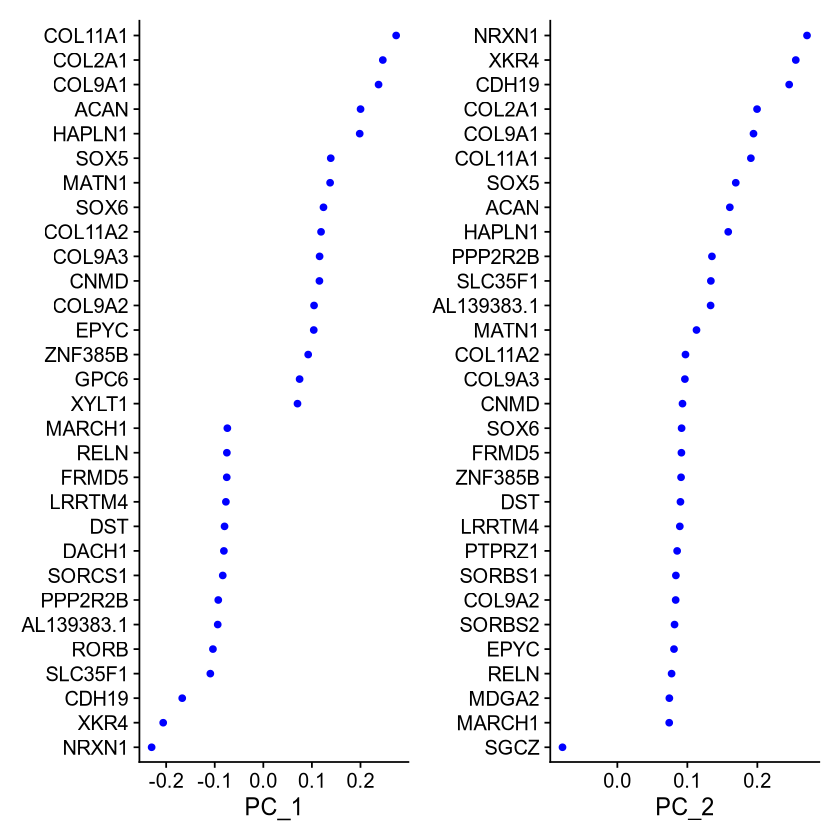

In [102]:
VizDimLoadings(all_atac, dims = 1:2, reduction = "pca")

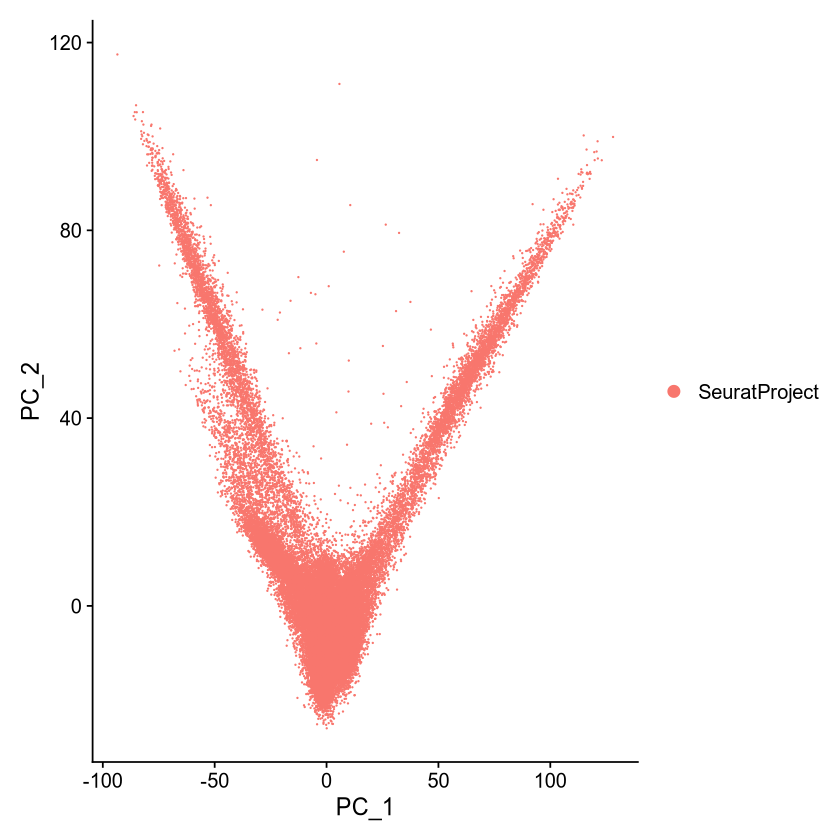

In [103]:
DimPlot(all_atac, reduction = "pca")

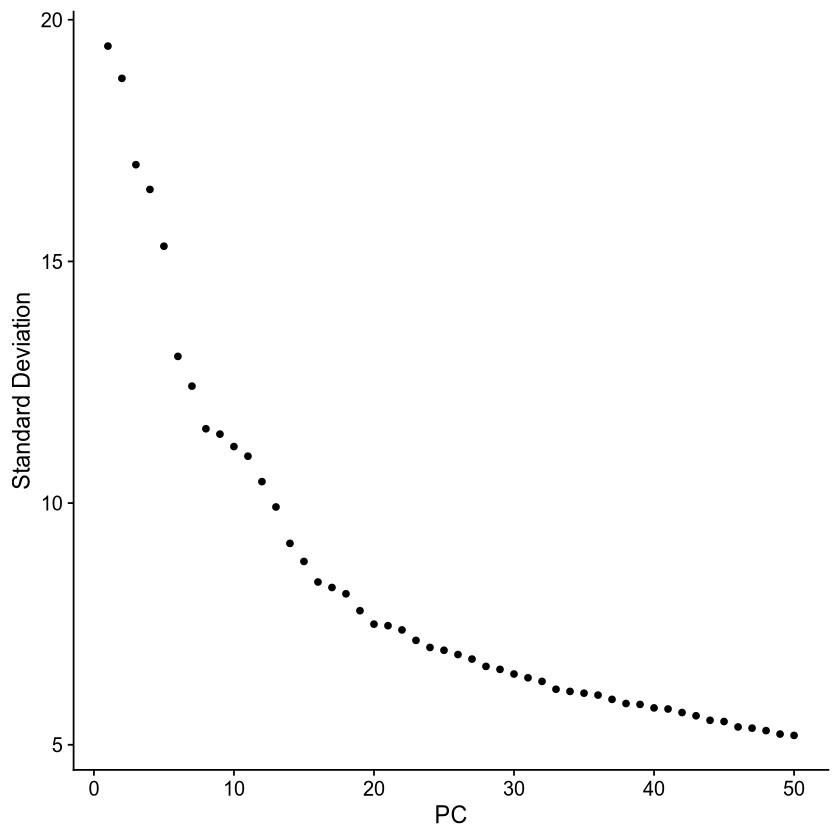

In [105]:
ElbowPlot(all_atac, ndims=50)

In [106]:
saveRDS(all_atac, "all_multiom.rds")

In [3]:
all_atac=readRDS('all_multiom.rds')

In [108]:
all_atac

An object of class Seurat 
523048 features across 91740 samples within 3 assays 
Active assay: SCT (43256 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: ATAC, RNA
 1 dimensional reduction calculated: pca

In [9]:
DefaultAssay(all_atac) <- "ATAC"

In [10]:

# remove peaks on nonstandard chromosomes and in genomic blacklist regions
peaks <- keepStandardChromosomes(granges(all_atac), pruning.mode = "coarse")
peaks <- subsetByOverlaps(x = peaks, ranges = blacklist_hg38_unified, invert = TRUE)

In [11]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,14149845,755.7,21021741,1122.7,21021741,1122.7
Vcells,9644147203,73579.1,14792165279,112855.3,9831473533,75008.2


In [12]:
# Convert to character vector in 'chr-start-end' format
rownames_format <- paste0(seqnames(peaks), "-", start(peaks), "-", end(peaks))


In [20]:
all_atac[["ATAC"]] <- subset(all_atac[["ATAC"]], features = rownames_format)

Warning message:
"Different cells and/or features from existing assay ATAC"


In [21]:
all_atac

An object of class Seurat 
522720 features across 91740 samples within 3 assays 
Active assay: ATAC (427669 features, 0 variable features)
 2 layers present: counts, data
 2 other assays present: RNA, SCT
 1 dimensional reduction calculated: pca

In [14]:
GenomeInfoDb::seqlevelsStyle(annotation) <- "UCSC"

In [15]:
genome(annotation) = "hg38"

In [16]:
Annotation(all_atac[["ATAC"]])<- annotation

In [17]:
Annotation(all_atac[["ATAC"]])

GRanges object with 3021151 ranges and 5 metadata columns:
                  seqnames        ranges strand |           tx_id   gene_name
                     <Rle>     <IRanges>  <Rle> |     <character> <character>
  ENSE00001489430     chrX 276322-276394      + | ENST00000399012      PLCXD1
  ENSE00001536003     chrX 276324-276394      + | ENST00000484611      PLCXD1
  ENSE00002160563     chrX 276353-276394      + | ENST00000430923      PLCXD1
  ENSE00001750899     chrX 281055-281121      + | ENST00000445062      PLCXD1
  ENSE00001489388     chrX 281192-281684      + | ENST00000381657      PLCXD1
              ...      ...           ...    ... .             ...         ...
  ENST00000361739     chrM     7586-8269      + | ENST00000361739      MT-CO2
  ENST00000361789     chrM   14747-15887      + | ENST00000361789      MT-CYB
  ENST00000361851     chrM     8366-8572      + | ENST00000361851     MT-ATP8
  ENST00000361899     chrM     8527-9207      + | ENST00000361899     MT-ATP6
  ENS

In [22]:
DefaultAssay(all_atac) <- "ATAC"
# first compute the GC content for each peak
all_atac <- RegionStats(all_atac, genome = BSgenome.Hsapiens.UCSC.hg38)

Warning message in RegionStats.default(object = regions, genome = genome, verbose = verbose, :
"Not all seqlevels present in supplied genome"


In [23]:
rm(annotation)

In [24]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,14212015,759.1,21021741,1122.7,21021741,1122.7
Vcells,9650902618,73630.6,14792165279,112855.3,13739618509,104825.0


In [26]:
set.seed(1234)

In [25]:
saveRDS(all_atac, "all_multiom.rds")

In [29]:
options(future.globals.maxSize = 5000000 * 1024^2)

## Find links 

In [30]:
# link peaks to genes
all_atac <- LinkPeaks(
  object = all_atac,
  peak.assay = "ATAC",
  expression.assay = "SCT"
  )
all_atac_links=as.data.frame(Links(all_atac))
write.csv(all_atac_links, 'links_all_multiom.csv')

Testing 23439 genes and 427663 peaks

Found gene coordinates for 15952 genes

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': GL000195.1, GL000205.2, GL000219.1, KI270711.1, KI270713.1, KI270721.1, KI270727.1, KI270728.1, KI270731.1, KI270734.1
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_lapply-1') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore"."
Warning messa

In [31]:
Links(all_atac)

GRanges object with 33813 ranges and 5 metadata columns:
          seqnames              ranges strand |     score        gene
             <Rle>           <IRanges>  <Rle> | <numeric> <character>
      [1]     chr1       923928-940374      * | 0.0537304      SAMD11
      [2]     chr1       923928-941849      * | 0.0873264      SAMD11
      [3]     chr1       923928-943211      * | 0.0534437      SAMD11
      [4]     chr1      941849-1000172      * | 0.0565787        HES4
      [5]     chr1      993801-1000172      * | 0.0840174        HES4
      ...      ...                 ...    ... .       ...         ...
  [33809]     chrX 154728086-154751583      * | 0.0653094        GAB3
  [33810]     chrX 154738245-154751583      * | 0.0652004        GAB3
  [33811]     chrX 154784467-154821007      * | 0.0731706        MPP1
  [33812]     chrX 154799724-154821007      * | 0.0587748        MPP1
  [33813]     chrX 155334657-155334851      * | 0.1089604       CLIC2
                            peak 

In [28]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,14277902,762.6,21021741,1122.7,21021741,1122.7
Vcells,9651063399,73631.8,14792165279,112855.3,14318310009,109240.1


In [78]:
saveRDS(all_atac, "all_atac.rds")

## Differntial accessibility analysis 

In [4]:
all_atac=readRDS("all_atac.rds")

In [5]:
library(future)

In [3]:
library(Signac)

In [9]:
plan('multicore')

In [222]:
# change back to working with peaks instead of gene activities
DefaultAssay(all_atac) <- 'ATAC'

In [ ]:


# wilcox is the default option for test.use
da_peaks <- FindAllMarkers(
  object = all_atac,
  test.use = 'wilcox',
  min.pct = 0.1
)
da_peaks_df=as.data.frame(da_peaks)
write.csv(da_peaks_df, 'da_peaks_all_atac.csv')


Calculating cluster dermal

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster chondrocytes

Calculating cluster glia



In [13]:
da_peaks_df

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
chr2-228387388-228388307,0,6.041471,0.192,0.003,0,dermal,chr2-228387388-228388307
chr6-102449266-102450330,0,5.918019,0.129,0.002,0,dermal,chr6-102449266-102450330
chr18-52130360-52131305,0,5.758832,0.106,0.002,0,dermal,chr18-52130360-52131305
chr18-71733651-71734617,0,5.745410,0.146,0.003,0,dermal,chr18-71733651-71734617
chr20-60840668-60841617,0,5.740950,0.161,0.003,0,dermal,chr20-60840668-60841617
chr7-35278720-35279639,0,5.727470,0.118,0.002,0,dermal,chr7-35278720-35279639
chr14-57550107-57551229,0,5.721550,0.164,0.003,0,dermal,chr14-57550107-57551229
chr2-140416469-140417421,0,5.696483,0.145,0.003,0,dermal,chr2-140416469-140417421
chr3-114864742-114865669,0,5.692845,0.225,0.004,0,dermal,chr3-114864742-114865669


In [10]:
library(ggforce)

In [244]:
## to make the visualization easier
idents.plot <- c("dermal", "osteogenic", "glia", 'mesenchyme_D')

p1 <- CoveragePlot(
  object = all_atac,
  region= 'chr20-21680948-21682275',
  features = "PAX1",
  expression.assay = "SCT",
  idents = idents.plot,
  extend.upstream = 50000,
  extend.downstream = 100000
)

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`).”


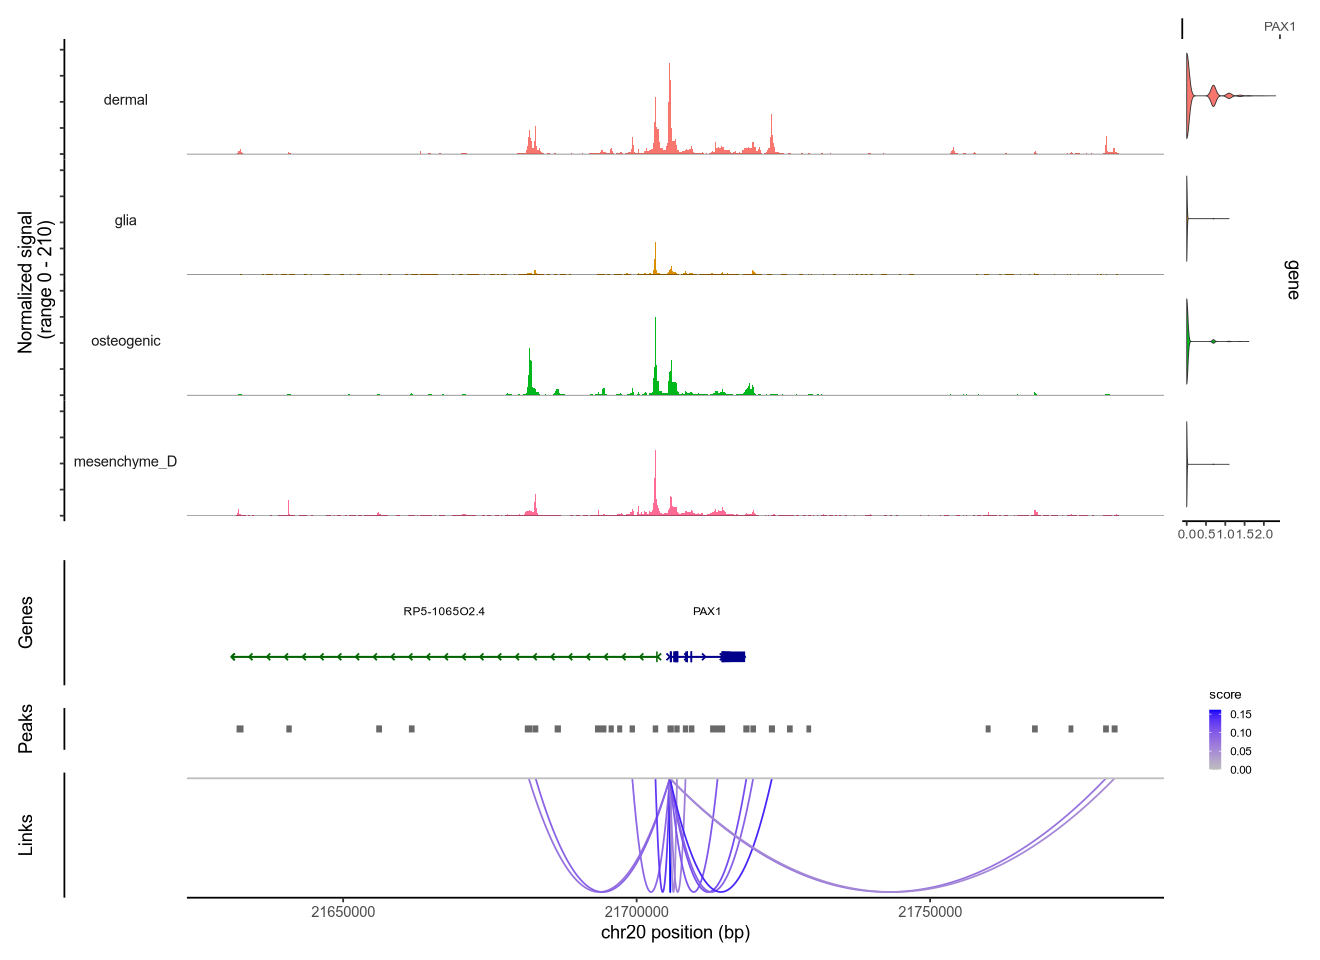

In [245]:
options(repr.plot.width=11, repr.plot.height=8)
p1

In [23]:
da_peaks %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 2) %>%
    dplyr::filter(p_val_adj < 0.05)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,6.041471,0.192,0.003,0,dermal,chr2-228387388-228388307
0,5.918019,0.129,0.002,0,dermal,chr6-102449266-102450330
0,5.758832,0.106,0.002,0,dermal,chr18-52130360-52131305
0,5.745410,0.146,0.003,0,dermal,chr18-71733651-71734617
0,5.740950,0.161,0.003,0,dermal,chr20-60840668-60841617
0,5.727470,0.118,0.002,0,dermal,chr7-35278720-35279639
0,5.721550,0.164,0.003,0,dermal,chr14-57550107-57551229
0,5.696483,0.145,0.003,0,dermal,chr2-140416469-140417421
0,5.692845,0.225,0.004,0,dermal,chr3-114864742-114865669


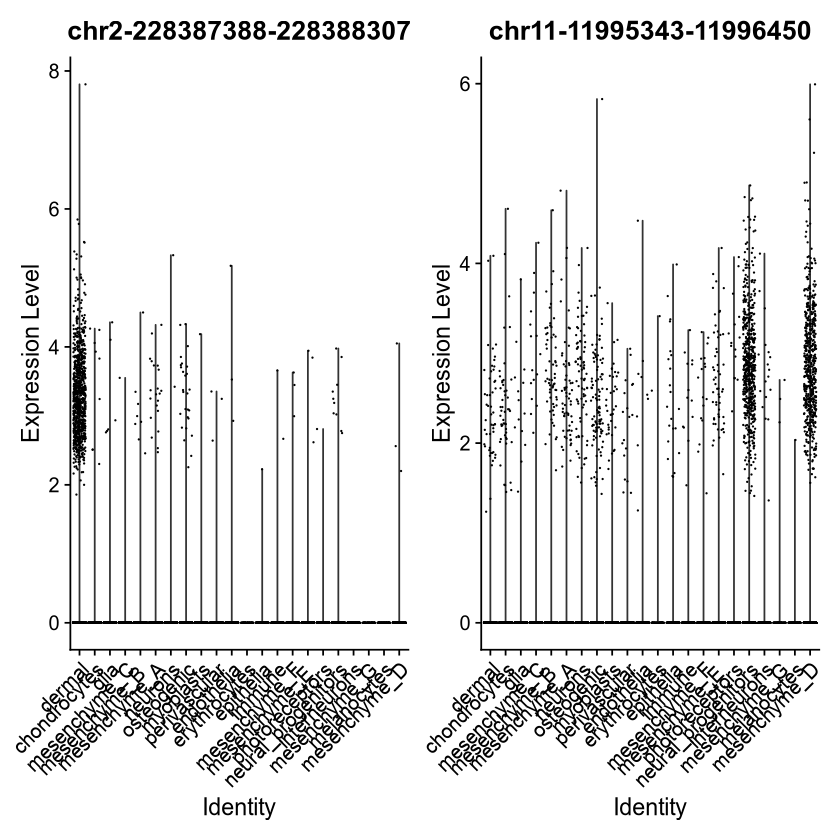

In [24]:
VlnPlot(all_atac, features = c("chr2-228387388-228388307", "chr11-11995343-11996450"))

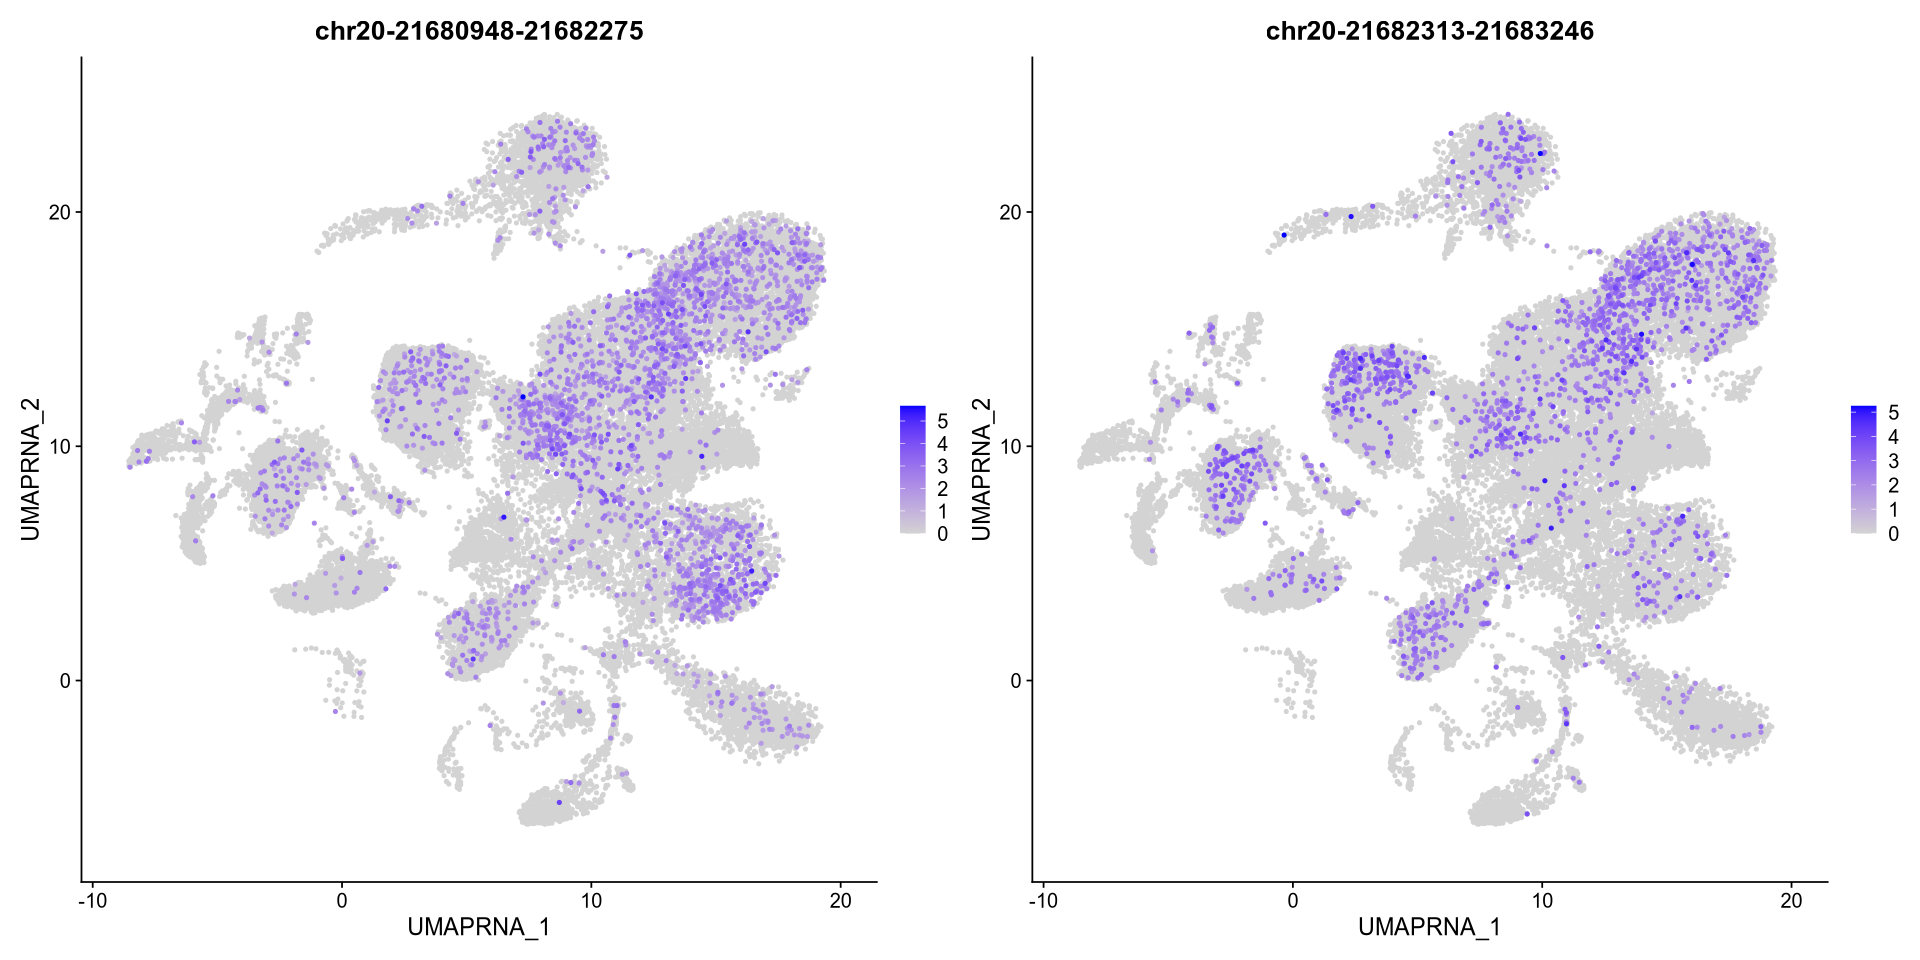

In [249]:
options(repr.plot.width=16, repr.plot.height=8)
FeaturePlot(all_atac, features = c('chr20-21680948-21682275','chr20-21682313-21683246'), pt.size=0.8, order=TRUE, alpha=1)

In [241]:
DefaultAssay(all_atac) <- 'ATAC'

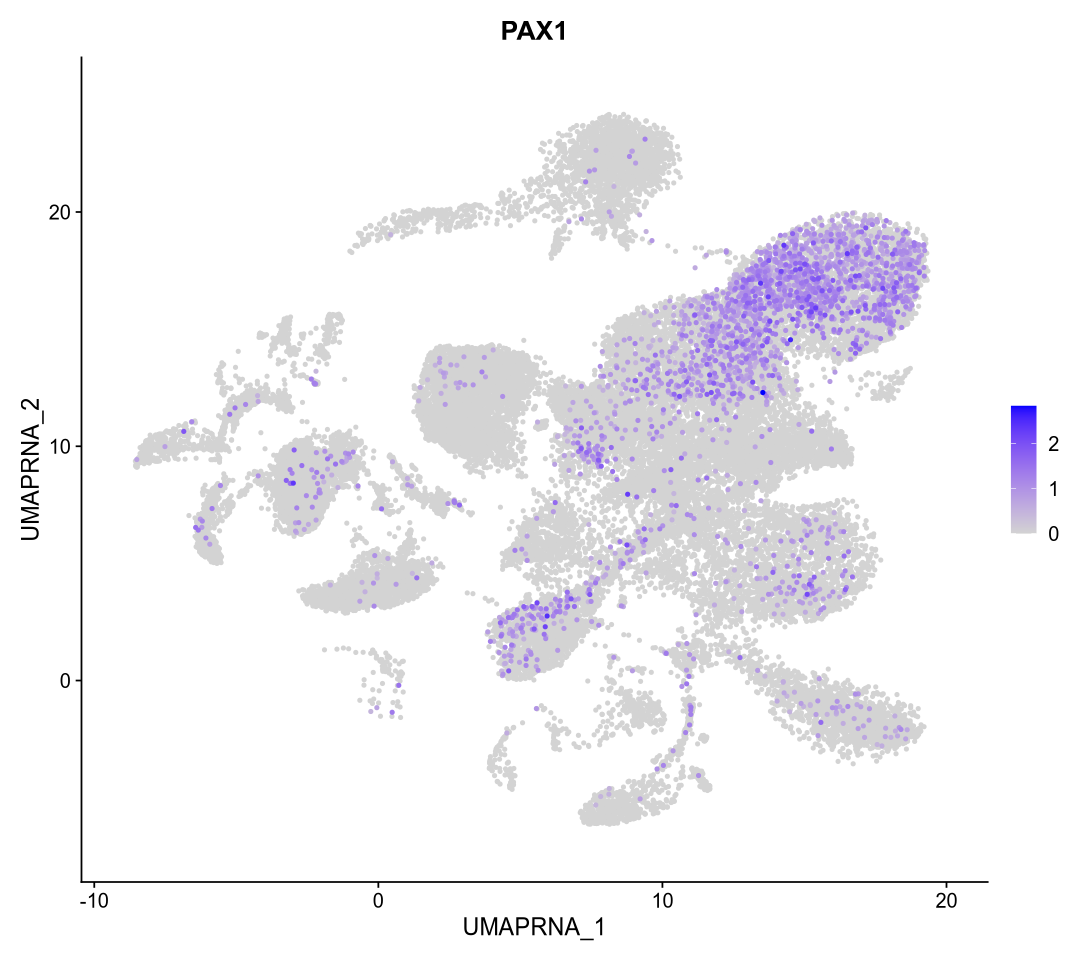

In [239]:
options(repr.plot.width=9, repr.plot.height=8)
FeaturePlot(all_atac, features = c('PAX1'), reduction = "umap",ncol = 1, pt.size=0.8, order=TRUE, alpha=1)

In [23]:
idents.plot <- c("dermal", "osteogenic", "glia", 'mesenchyme_D')

p1 <- CoveragePlot(
  object = all_atac,
  region= 'chr1-23530880-23531764',
  features = "E2F2",
  expression.assay = "SCT",
  idents = idents.plot,
  extend.upstream = 10000,
  extend.downstream = 10000
)

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`).”


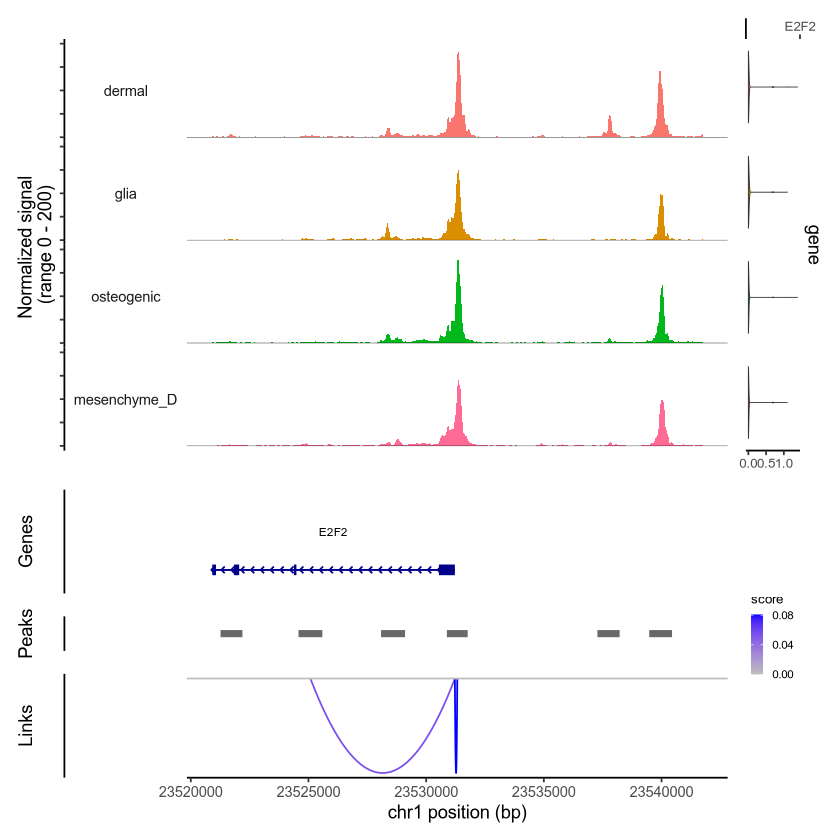

In [24]:
p1